# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

There are two main approaches for enterprises to promote
products and/or services: through mass campaigns,
targeting general indiscriminate public or directed
marketing, targeting a specific set of contacts.

In this paper, Data Mining (DM) approach has been used for
bank direct marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [30]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import sys

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pylab as plt
from imblearn.over_sampling import SMOTE

#import os
#from google.colab import drive
#drive.mount('/content/drive')
#os.chdir('/content/drive/MyDrive/ColabNotebooks/')


import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(display="diagram")

In [31]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df_orig=df
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Panda Profiling will provide detailed information about different fields in the input data

In [33]:
#%pip install pandas-profiling
#%pip install ydata-profiling
#
#from ydata_profiling import ProfileReport
#%pip install category_encoders
#run the profile report
#profile = ProfileReport(df)
#profile.to_file(output_file='data/output.html')
#profile

Understand the data using histogram and other plots. In addition, identify the outliers

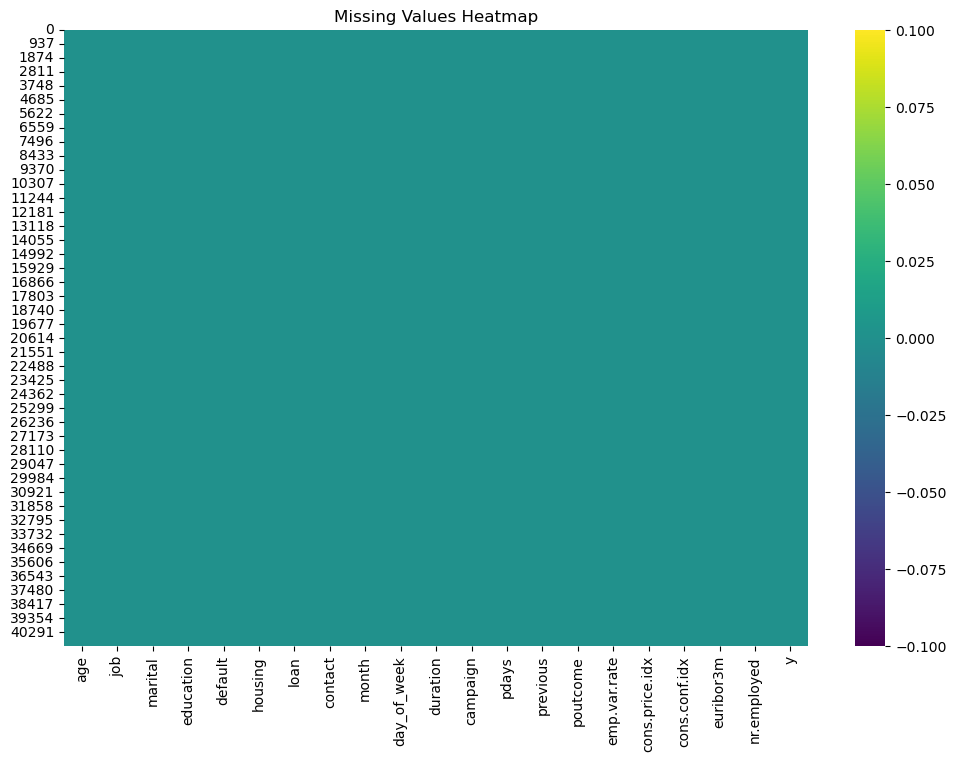

In [34]:
# Display if there are any missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.savefig('images/missing_values_before.png')
plt.show()

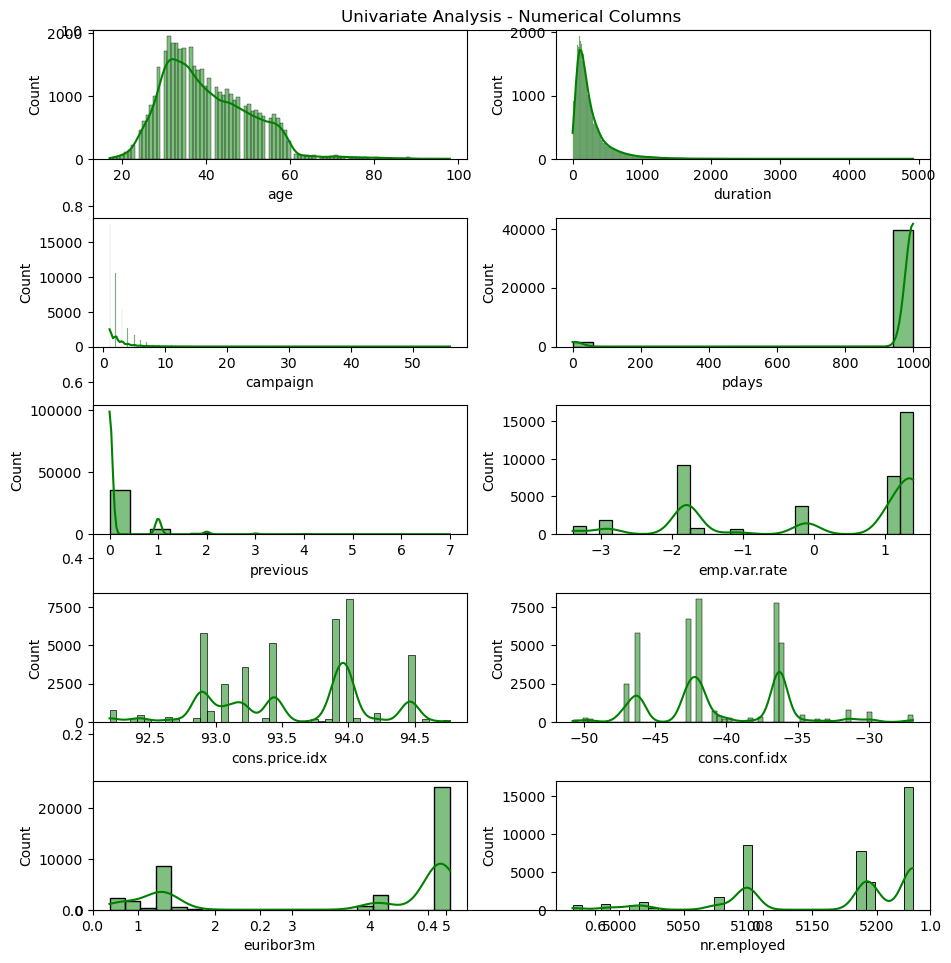

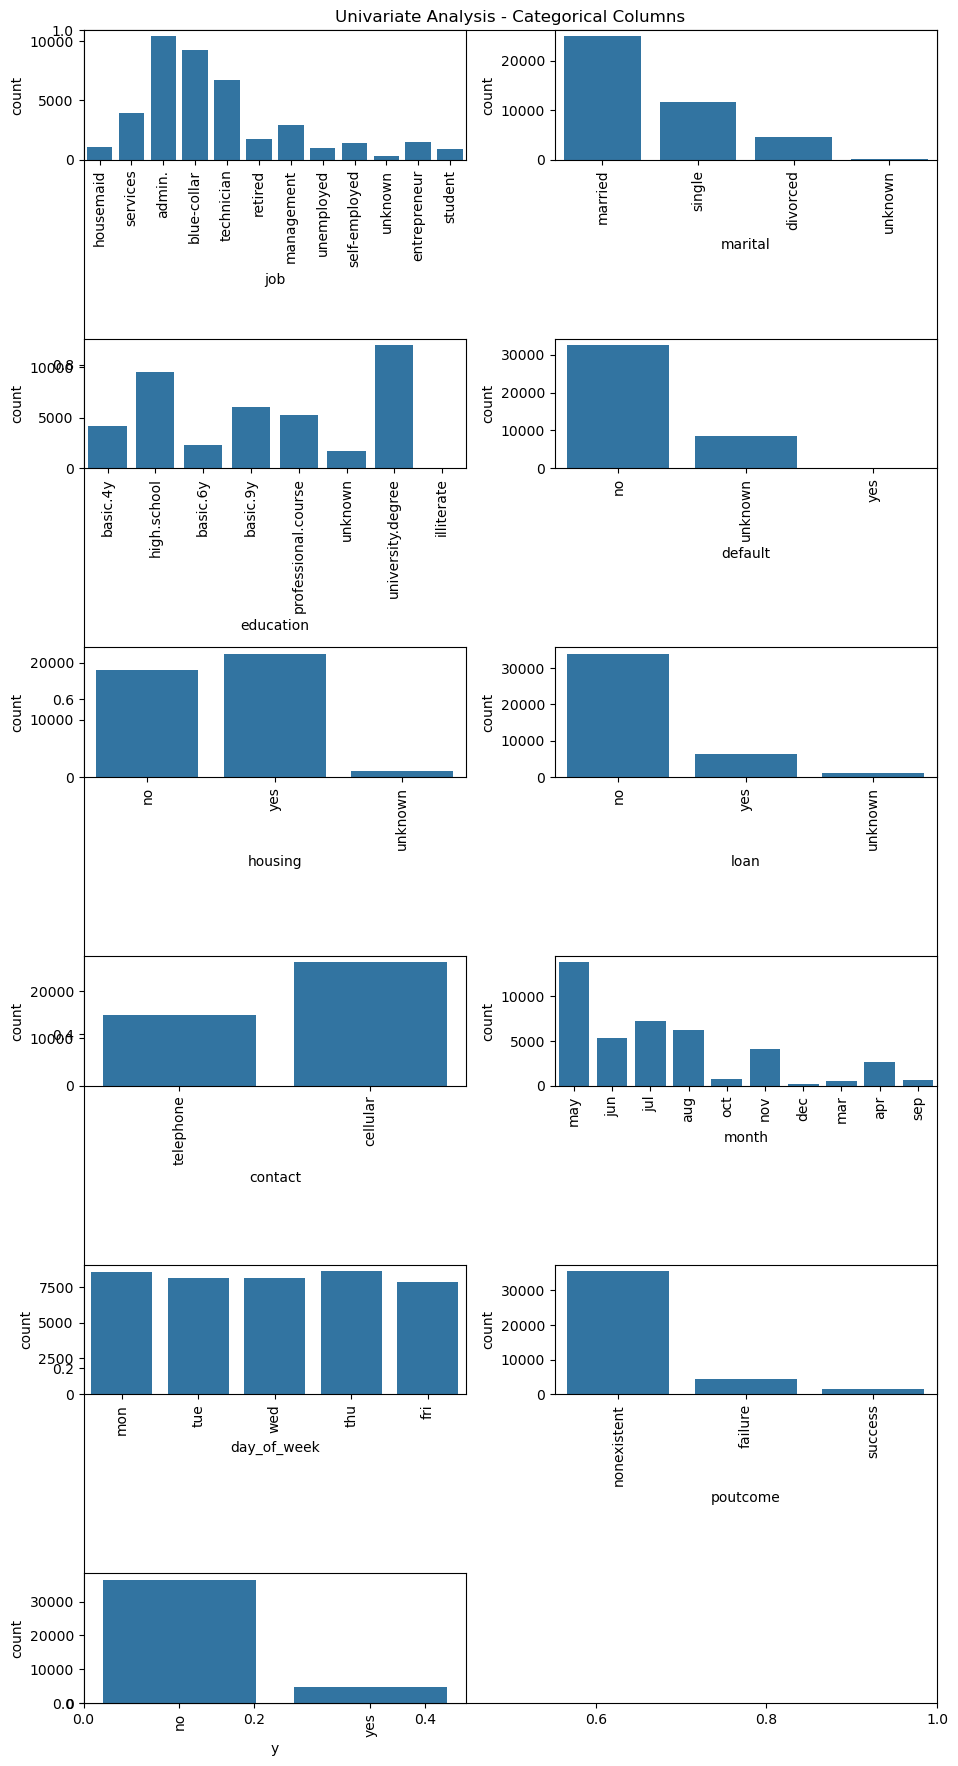

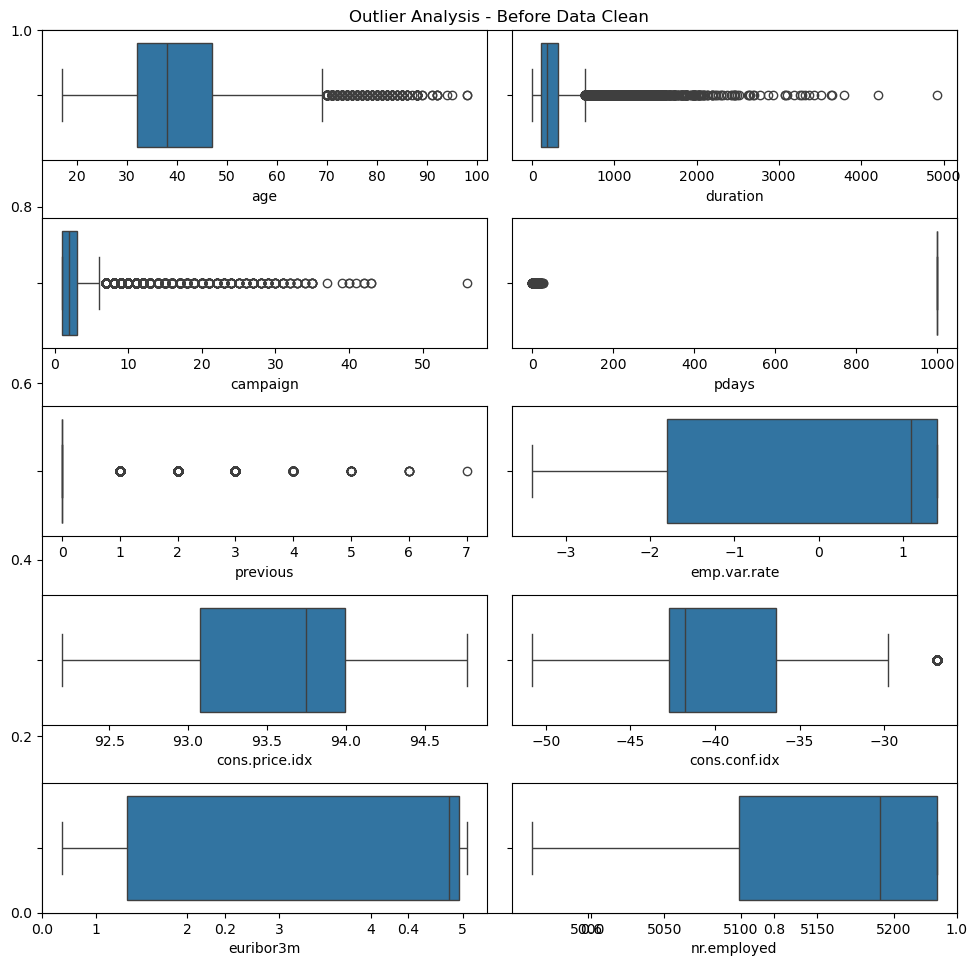

In [35]:
# Univariate Analysis on numerical columns


numerical_cols = ''

numerical_cols = df.select_dtypes(include=[np.number])
categorical_cols = df.select_dtypes(exclude=[np.number])


plt.figure(figsize=(10,10))                                         # set the canvas size
plt.title ('Univariate Analysis - Numerical Columns')
plotnumber = 1                                                      # create a variable for plotting numbers
for i in numerical_cols :                                                    # use for loop to iterate the loop
    plt.subplot(5,2,plotnumber)                                     # use subplot to plot figure in rows & columns
    sns.histplot(x = numerical_cols[i],color='green',kde=True)                # plot Histogram
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.savefig('images/numvar-analysis.png')
plt.show()

plt.figure(figsize=(10,18))                                         # set the canvas size
plt.title ('Univariate Analysis - Categorical Columns')

plotnumber = 1
for i in categorical_cols :                                                    # use for loop to iterate the loop
    plt.subplot(6,2,plotnumber)                                     # use subplot to plot figure in rows & columns
    sns.countplot(x = categorical_cols[i])                                     # plot countplot
    plotnumber = plotnumber + 1
    plt.xticks(rotation=90)
plt.tight_layout()                                                  # to avoid the overlapping
plt.savefig('images/catvar-analysis.png')
plt.show()
# outlier checking

plt.figure(figsize=(10,10))            # canvas size
plt.title ('Outlier Analysis - Before Data Clean')
plotnumber = 1                        # variable
for i in numerical_cols:                        # use for loop
    plt.subplot(5,2,plotnumber)    # set number of rows & columns
    sns.boxplot(x=numerical_cols[i])        # use Box-plot to see outlier
    plotnumber = plotnumber + 1
plt.tight_layout()               # to ignore overlapping
plt.savefig('images/outliers-before.png')



Bivariate Analysis to understand the correlation

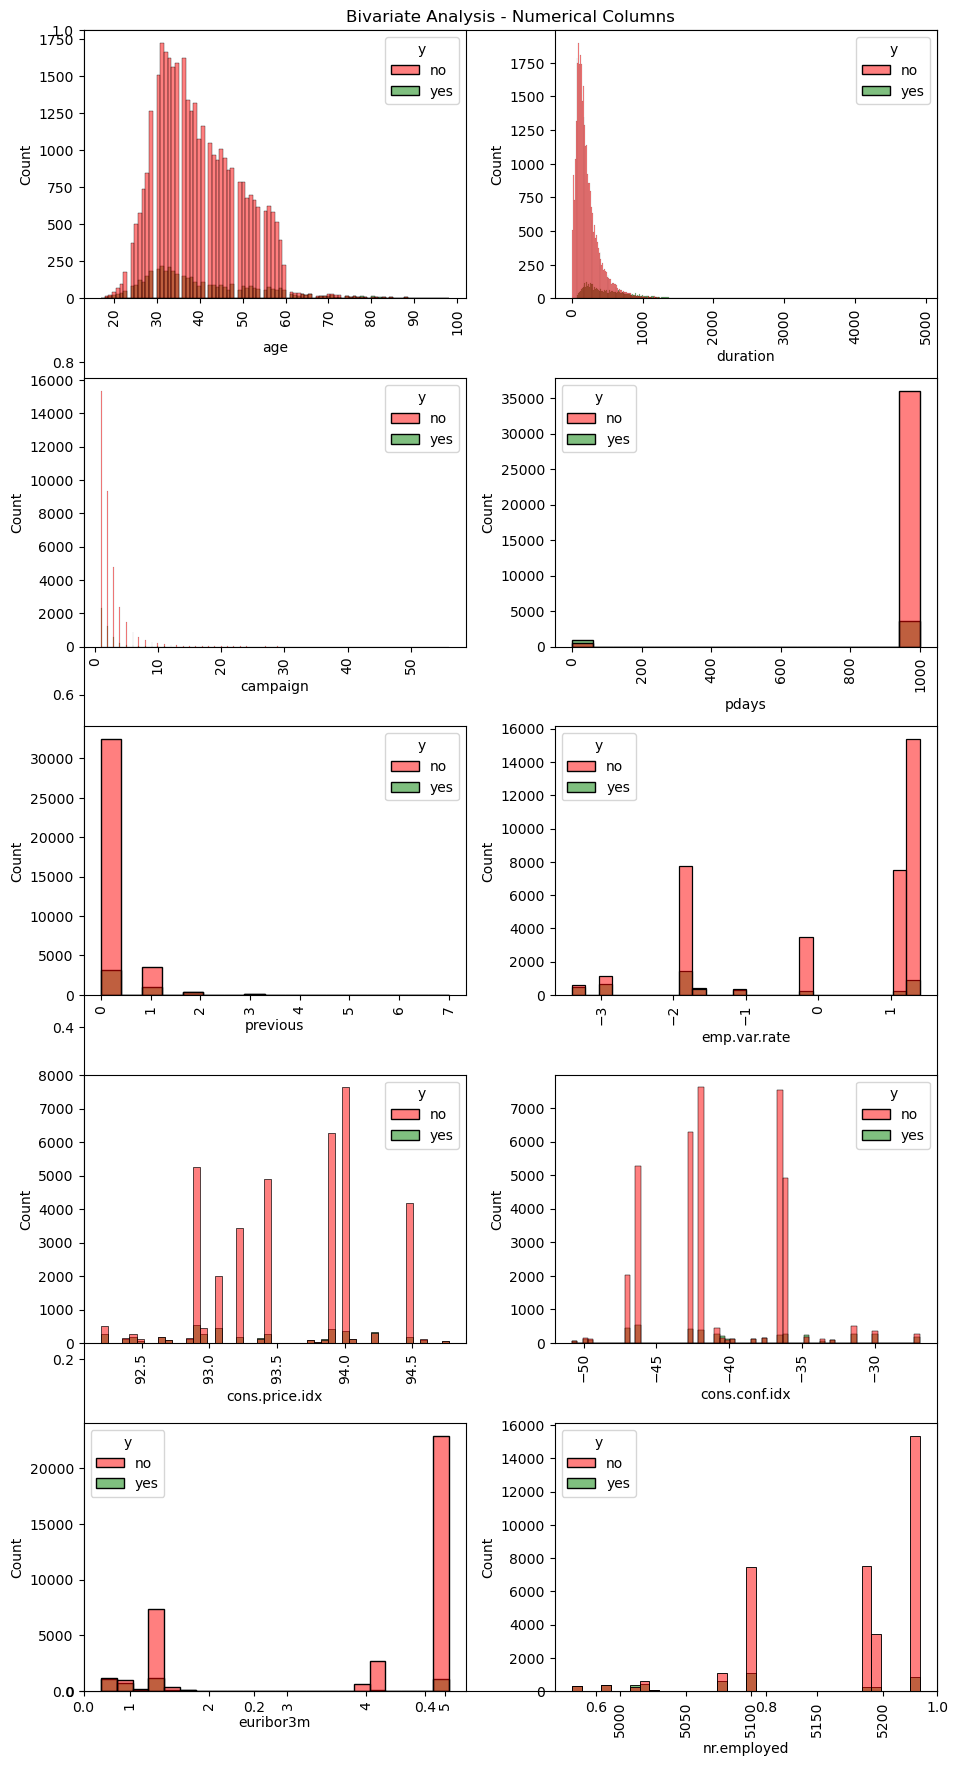

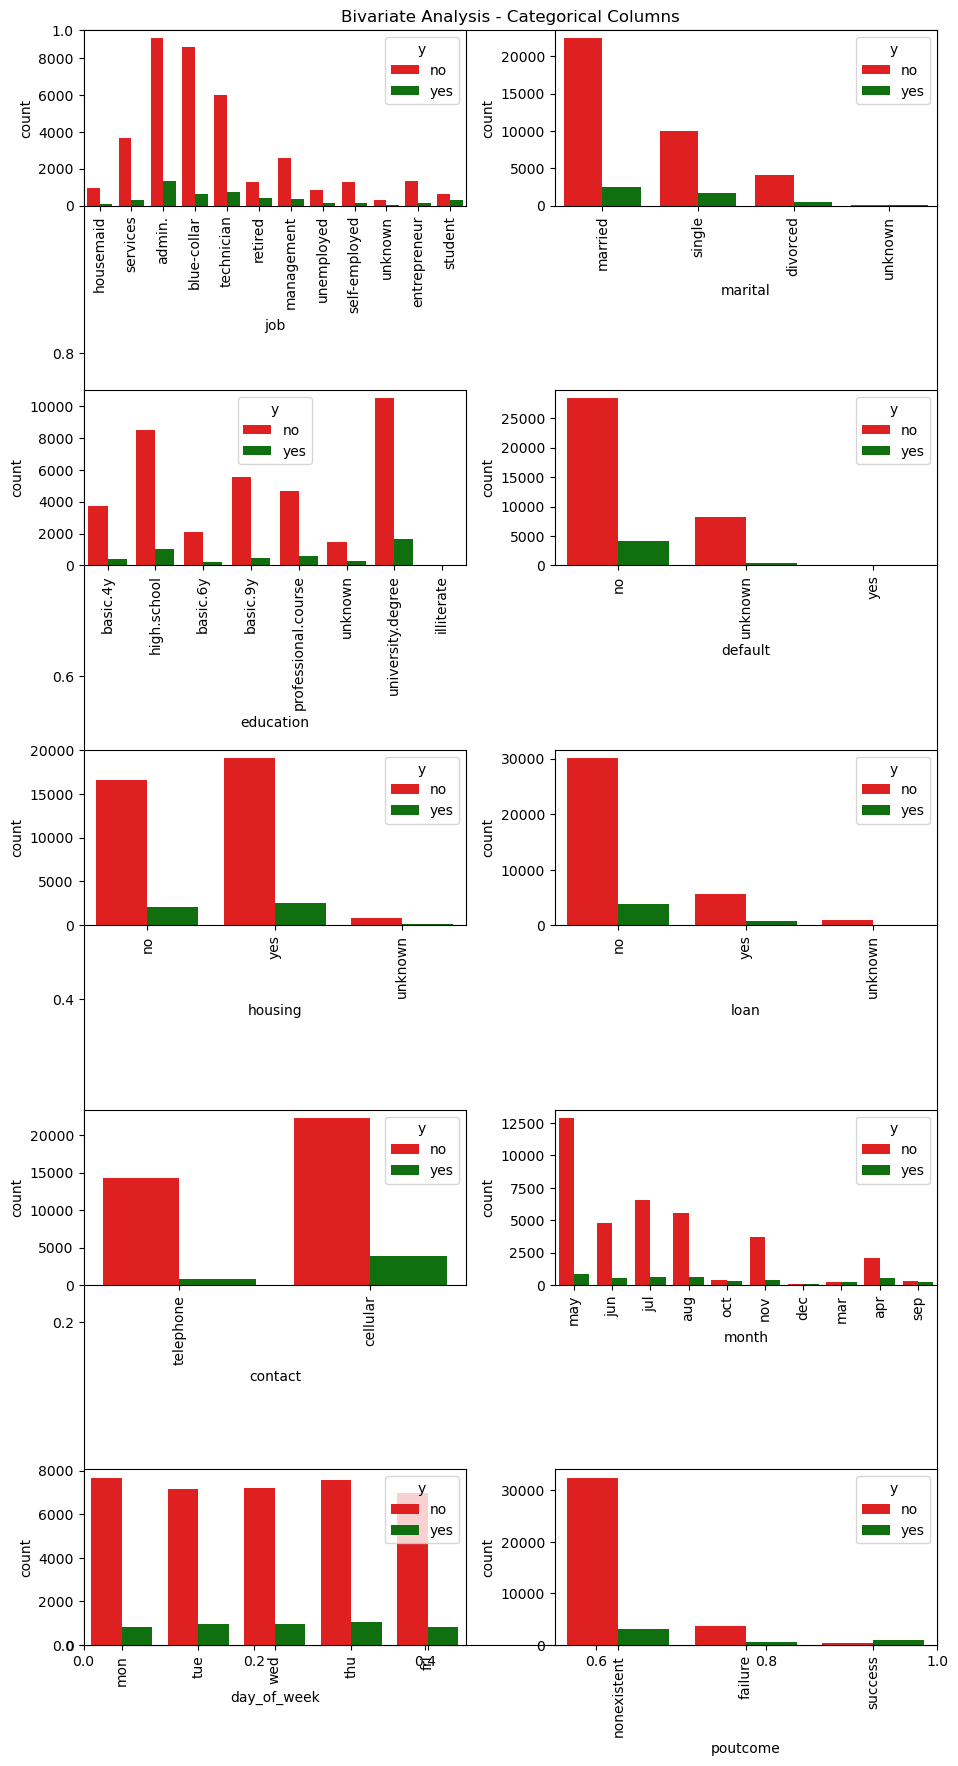

In [36]:
#Bivariate Analysis
## Bivariate analysis for Numerical Columns

plt.figure(figsize=(10,18))                                         # set the canvas size
plt.title ('Bivariate Analysis - Numerical Columns')
plotnumber = 1                                                      # create a variable for plotting numbers
for i in numerical_cols :                                                    # use for loop to iterate the loop
    plt.subplot(5,2,plotnumber)                                     # use subplot to plot figure in rows & columns
    sns.histplot(x = numerical_cols[i],hue=df.y,palette=['red', 'green'])       # plot Histogram with Target
    plotnumber = plotnumber + 1
    plt.xticks(rotation=90)
plt.tight_layout()                                                  # to avoid the overlapping
plt.savefig('images/bivariate-Num.png')


## Bivariate analysis for Categorical Columns
plt.figure(figsize=(10,18))                                         # set the canvas size
plt.title ('Bivariate Analysis - Categorical Columns')
plotnumber = 1                                                      # create a variable for plotting numbers
for i in categorical_cols.drop('y',axis=1) :                                   # use for loop to iterate the loop
    plt.subplot(5,2,plotnumber)                                     # use subplot to plot figure in rows & columns
    sns.countplot(x = categorical_cols[i],hue=df.y,palette=['r', 'g'])       # plot Countplot with Target class
    plotnumber = plotnumber + 1
    plt.xticks(rotation=90)
plt.tight_layout()                                                  # to avoid the overlapping
plt.savefig('images/bivariate-Cat.png')

Data cleaning and removing outliers

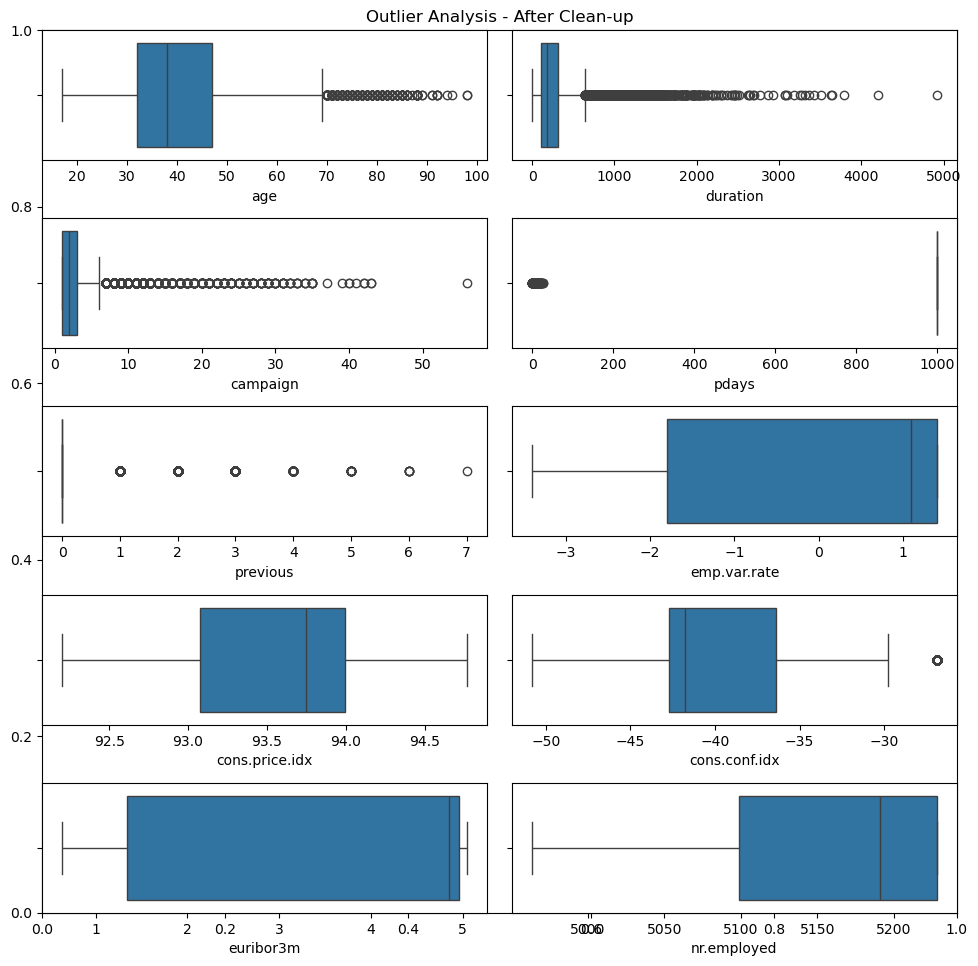

In [37]:

# Remove duplicate rows ( From the profile, ~12 duplicate rows in the dataframe)
df=df_orig

df.dropna()
df.drop_duplicates(inplace=True)

numerical_cols = df.select_dtypes(include=[np.number])

#Rechecking the outliers
# outlier checking

plt.figure(figsize=(10,10))            # canvas size
plt.title ('Outlier Analysis - After Clean-up')
plotnumber = 1                        # variable
for i in numerical_cols:                        # use for loop
    plt.subplot(5,2,plotnumber)    # set number of rows & columns
    sns.boxplot(x=numerical_cols[i])        # use Box-plot to see outlier
    plotnumber = plotnumber + 1
plt.tight_layout()               # to ignore overlapping

plt.savefig('images/outliers-after.png')

A label encoder is used to convert categorical data (text values) into numerical values, allowing machine learning models to process and analyze categorical features, as most algorithms require numerical input; it's a crucial data pre-processing step to make categorical data compatible with machine learning models.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Business objective will be we apply a Data Mining (DM) approach to
bank direct marketing campaigns. In particular, we used
real-world and recent data from a Portuguese bank and
performed multiple iterations of the CRISP-DM methodology,
We compare and contrast  multiple models for accuracy.

In [38]:
df.info()
df['y'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

y
no     36537
yes     4639
Name: count, dtype: int64

Data is not balanced. It would require balancing the data
min_value = df['cons.conf.idx'].min()
print(min_value)

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [39]:
# prompt: minmax scalar for cons.price.idx', 'cons.conf.idx', split the dataframe into test and train, use one hot encoding on X and label encoding for Y. Use undersampling to sample the data

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler

df=df_orig
df.dropna()
df.drop_duplicates(inplace=True)

# Assuming 'df' is your DataFrame and 'y' is the target column
X = df.drop('y', axis=1)
y = df['y']

# Apply MinMaxScaler to 'cons.price.idx' and 'cons.conf.idx'
scaler = MinMaxScaler(feature_range=(0, 1))
X[['cons.price.idx', 'cons.conf.idx','emp.var.rate']] = scaler.fit_transform(X[['cons.price.idx', 'cons.conf.idx','emp.var.rate']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fill the data and remove outliers
#X_train.loc[X_train['age']>75,'age'] = X_train.age.median()
#X_test.loc[X_test['age']>75,'age'] = X_test.age.median()

X_train.loc[X_train['campaign'] > 29,'campaign'] = X_train.campaign.median()
X_test.loc[X_test['campaign'] > 29,'campaign'] = X_test.campaign.median()

X_train.loc[X_train['cons.conf.idx'] >-30,'cons.conf.idx'] = X_train['cons.conf.idx'].median()
X_test.loc[X_test['cons.conf.idx'] >-30,'cons.conf.idx'] = X_test['cons.conf.idx'].median()


# One-hot encode categorical features in X
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)


onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = onehot_encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = onehot_encoder.transform(X_test[categorical_cols])

# Create new DataFrames with encoded features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded features with numerical features
X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Label encode the target variable y
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = undersampler.fit_resample(X_test, y_test)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [40]:
# prompt: from X_train_resampled , select 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and impute them and store it back in the 

# Create a copy to avoid modifying the original DataFrame
X_train_processed = X_train_resampled.copy()

# Select the specified columns
cols_to_impute = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
data_to_impute = X_train_processed[cols_to_impute]

# Impute missing values using the mean (you can choose other imputation methods as well)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
imputed_data = imputer.fit_transform(data_to_impute)

# Replace the original columns with the imputed data
X_train_processed[cols_to_impute] = imputed_data

# Now X_train_processed contains the imputed values for the specified columns
X_train_resampled = X_train_processed

In [41]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7336 entries, 31383 to 37205
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            7336 non-null   float64
 1   duration                       7336 non-null   float64
 2   campaign                       7336 non-null   float64
 3   pdays                          7336 non-null   float64
 4   previous                       7336 non-null   float64
 5   emp.var.rate                   7336 non-null   float64
 6   cons.price.idx                 7336 non-null   float64
 7   cons.conf.idx                  7336 non-null   float64
 8   euribor3m                      7336 non-null   float64
 9   nr.employed                    7336 non-null   float64
 10  job_admin.                     4775 non-null   float64
 11  job_blue-collar                4775 non-null   float64
 12  job_entrepreneur               4775 non-null   f

In [42]:
## prompt: impute the data and use SelectKBest model on X_train and Y_train and  list the best features

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer

# Assuming X_train and y_train are defined from the previous code
# Impute missing values (if any)
imputer = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train_resampled)

# Use SelectKBest to get the top k features
k = 10  # Choose the number of top features you want
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(X_train_imputed, y_train_resampled)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features (if you have column names)
feature_names = list(X_train_resampled.columns)
selected_features = [feature_names[i] for i in selected_feature_indices]

# Print the selected feature names
print("Selected Features:", selected_features)
selected_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Selected Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'job_student']


In [43]:
# Define function  to print classification report with time.
def print_model_results(model, train_t, train_acc, test_acc, test_pred):
  """Prints model training and testing results."""
  print("Model:", model)
  print("Train Time:", train_t)
  print("Train Accuracy:", train_acc)
  print("Test Accuracy:", test_acc)
  print(classification_report(y_test_resampled, test_pred))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [44]:
# prompt: Build Majority Rate Classifier and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report

from sklearn.metrics import classification_report
import time

# Assuming X_train_imputed, y_train_resampled, X_test_imputed, and y_test_resampled are defined
# from the previous code.

# Initialize and train the Majority Class Classifier
start_time = time.time()
majority_class = max(set(y_train_resampled), key=list(y_train_resampled).count)
y_pred_train = [majority_class] * len(y_train_resampled)
y_pred_test = [majority_class] * len(y_test_resampled)
end_time = time.time()

train_time = end_time - start_time

train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test_resampled, y_pred_test)

print_model_results(majority_class, train_time, train_accuracy, test_accuracy, y_pred_test)


Model: 0
Train Time: 0.0007550716400146484
Train Accuracy: 0.5
Test Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       971
           1       0.00      0.00      0.00       971

    accuracy                           0.50      1942
   macro avg       0.25      0.50      0.33      1942
weighted avg       0.25      0.50      0.33      1942



### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [45]:
# Logistic Regression Model
#selected_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

#print(selected_features)
# Create the logistic regression model
logreg = LogisticRegression()

# Train the model using only the selected features
start_time = time.time()
logreg.fit(X_train_resampled[selected_features], y_train_resampled)
train_time = time.time() - start_time

# Make predictions
train_predictions = logreg.predict(X_train_resampled[selected_features])
test_predictions = logreg.predict(X_test_resampled[selected_features])


# Evaluate the model
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test_resampled, test_predictions)

print_model_results(logreg, train_time, train_accuracy, test_accuracy, test_predictions)


Model: LogisticRegression()
Train Time: 0.06200814247131348
Train Accuracy: 0.854825517993457
Test Accuracy: 0.8367662203913491
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       971
           1       0.83      0.84      0.84       971

    accuracy                           0.84      1942
   macro avg       0.84      0.84      0.84      1942
weighted avg       0.84      0.84      0.84      1942



In [46]:
# prompt: Impute the X_train_resampled and X_test_resampled, build KNN  model with Selected Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report

# Build the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the model and measure the training time
start_time = time.time()
knn_model.fit(X_train_resampled[selected_features], y_train_resampled)
train_time = time.time() - start_time

# Make predictions
train_predictions = knn_model.predict(X_train_resampled[selected_features])
test_predictions = knn_model.predict(X_test_resampled[selected_features])


# Evaluate the model
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test_resampled, test_predictions)


print_model_results(knn_model, train_time, train_accuracy, test_accuracy, test_predictions)


Model: KNeighborsClassifier()
Train Time: 0.003359079360961914
Train Accuracy: 0.8977644492911668
Test Accuracy: 0.8511843460350155
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       971
           1       0.83      0.88      0.86       971

    accuracy                           0.85      1942
   macro avg       0.85      0.85      0.85      1942
weighted avg       0.85      0.85      0.85      1942



In [47]:
# Train a Support Vector Machine (SVM) model
start_time = time.time()
svm_model = SVC(random_state=42)  # You can adjust hyperparameters here
svm_model.fit(X_train_resampled[selected_features], y_train_resampled)
train_time = time.time() - start_time

# Make predictions
train_predictions = svm_model.predict(X_train_resampled[selected_features])
test_predictions = svm_model.predict(X_test_resampled[selected_features])


# Evaluate the model
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test_resampled, test_predictions)

print_model_results(svm_model, train_time, train_accuracy, test_accuracy, test_predictions)


Model: SVC(random_state=42)
Train Time: 0.4524869918823242
Train Accuracy: 0.8492366412213741
Test Accuracy: 0.839340885684861
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       971
           1       0.85      0.82      0.84       971

    accuracy                           0.84      1942
   macro avg       0.84      0.84      0.84      1942
weighted avg       0.84      0.84      0.84      1942



In [48]:
#  Build Random Forest Model and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report


rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters

start_time = time.time()
rf_model.fit(X_train_resampled[selected_features], y_train_resampled)
train_time = time.time() - start_time

# Make predictions
train_predictions = rf_model.predict(X_train_resampled[selected_features])
test_predictions = rf_model.predict(X_test_resampled[selected_features])


# Evaluate the model
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test_resampled, test_predictions)

print_model_results(rf_model, train_time, train_accuracy, test_accuracy, test_predictions)


Model: RandomForestClassifier(random_state=42)
Train Time: 0.4268171787261963
Train Accuracy: 1.0
Test Accuracy: 0.880020597322348
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       971
           1       0.85      0.93      0.89       971

    accuracy                           0.88      1942
   macro avg       0.88      0.88      0.88      1942
weighted avg       0.88      0.88      0.88      1942



In [49]:
# prompt: Impute the X_train_resampled and X_test_resampled, build Decision Tree model with Selected Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report
from sklearn.tree import DecisionTreeClassifier

# Fit Decision Tree model
dt_model = DecisionTreeClassifier()
start_time = time.time()
dt_model.fit(X_train_resampled[selected_features], y_train_resampled)
train_time = time.time() - start_time

# Make predictions
train_predictions = dt_model.predict(X_train_resampled[selected_features])
test_predictions = dt_model.predict(X_test_resampled[selected_features])


# Evaluate the model
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test_resampled, test_predictions)

print_model_results(dt_model, train_time, train_accuracy, test_accuracy, test_predictions)


Model: DecisionTreeClassifier()
Train Time: 0.016268014907836914
Train Accuracy: 1.0
Test Accuracy: 0.831101956745623
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       971
           1       0.83      0.84      0.83       971

    accuracy                           0.83      1942
   macro avg       0.83      0.83      0.83      1942
weighted avg       0.83      0.83      0.83      1942



### Problem  9 and 10: Model Comparisons and Accuracy

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time(sec) | Train Accuracy | Test Accuracy | Precision | Recall |F1 Score |
| ----- | ---------- | -------------  | -----------   | -----------   | -----------   | -----------   |
|  Baseline   |  0.00075  |0.5    |0.5    | 0 | 0 |0 |
|  Log Reg    |  0.062   |0.85    |0.83   | 0.83 | 0.84 |0.84 |
|  KNN   |  0.003  |0.89    |0.85    | 0.83 | 0.88 |0.86 |
|  SVM   |  0.45  |0.84    |0.83    | 0.85 | 0.82 |0.84 |
|  RF   |  0.42  |1.0    |0.88    | 0.85 | 0.93 |0.89 |
|  DTree   |  0.16  |1.0    |0.83    | 0.83 | 0.84 |0.83 |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [50]:
# prompt: Impute the X_train_resampled and X_test_resampled, build Random Forest Model with hyperparameter tuning with Selected Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

start_time = time.time()
grid_search.fit(X_train_resampled[selected_features], y_train_resampled)
train_time = time.time() - start_time

best_rf_model = grid_search.best_estimator_


# Make predictions
train_predictions = grid_search.predict(X_train_resampled[selected_features])
test_predictions = grid_search.predict(X_test_resampled[selected_features])


# Evaluate the model
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test_resampled, test_predictions)


print_model_results(grid_search, train_time, train_accuracy, test_accuracy, test_predictions)


Model: GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')
Train Time: 48.483298778533936
Train Accuracy: 0.9397491821155943
Test Accuracy: 0.8805355303810505
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       971
           1       0.84      0.94      0.89       971

    accuracy                           0.88      1942
   macro avg       0.89      0.88      0.88      1942
weighted avg       0.89      0.88      0.88      1942



In [51]:
# prompt: Impute the X_train_resampled and X_test_resampled, build KNN classifier with hyper parameter tuning  with Selected Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report

# Hyperparameter tuning for KNN
knn_classifier = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)

start_time = time.time()
grid_search.fit(X_train_resampled[selected_features], y_train_resampled)
train_time = time.time() - start_time

best_rf_model = grid_search.best_estimator_


# Make predictions
train_predictions = grid_search.predict(X_train_resampled[selected_features])
test_predictions = grid_search.predict(X_test_resampled[selected_features])


# Evaluate the model
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test_resampled, test_predictions)

print_model_results(grid_search, train_time, train_accuracy, test_accuracy, test_predictions)


Model: GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})
Train Time: 1.5107431411743164
Train Accuracy: 1.0
Test Accuracy: 0.8583934088568486
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       971
           1       0.83      0.89      0.86       971

    accuracy                           0.86      1942
   macro avg       0.86      0.86      0.86      1942
weighted avg       0.86      0.86      0.86      1942



In [52]:
# prompt: Impute the X_train_resampled and X_test_resampled, build Decision tree classifier with hyper parameter tuning  with Selected Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
start_time = time.time()
grid_search.fit(X_train_resampled[selected_features], y_train_resampled)
train_time = time.time() - start_time

best_rf_model = grid_search.best_estimator_


# Make predictions
train_predictions = grid_search.predict(X_train_resampled[selected_features])
test_predictions = grid_search.predict(X_test_resampled[selected_features])


# Evaluate the model
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test_resampled, test_predictions)

print_model_results(grid_search, train_time, train_accuracy, test_accuracy, test_predictions)


Model: GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')
Train Time: 1.997298002243042
Train Accuracy: 0.920392584514722
Test Accuracy: 0.8661174047373842
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       971
           1       0.85      0.88      0.87       971

    accuracy                           0.87      1942
   macro avg       0.87      0.87      0.87      1942
weighted avg       0.87      0.87      0.87      1942



In [53]:
# prompt: Impute the X_train_resampled and X_test_resampled, build Support vector machine with hyper parameter tuning  with Selected Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] and print Model , Train Time , Train Accuracy,  Test Accuracy and classification_report

# Hyperparameter tuning for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

model = SVC()
grid_search = GridSearchCV(model, param_grid, refit=True, verbose=0)
start_time = time.time()
grid_search.fit(X_train_resampled[selected_features], y_train_resampled)
train_time = time.time() - start_time

best_rf_model = grid_search.best_estimator_


# Make predictions
train_predictions = grid_search.predict(X_train_resampled[selected_features])
test_predictions = grid_search.predict(X_test_resampled[selected_features])


# Evaluate the model
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test_resampled, test_predictions)

print_model_results(grid_search, train_time, train_accuracy, test_accuracy, test_predictions)
